In [125]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image

In [126]:
def frequency_masking(spectrogram, frequency_mask_param=10, num_masks=1):
    """Apply frequency masking to a spectrogram."""
    masked_spectrogram = spectrogram.copy()
    num_freqs = masked_spectrogram.shape[0]
    
    for _ in range(num_masks):
        f = 30
        f0 = np.random.randint(0, num_freqs - f)
        masked_spectrogram[f0:f0 + f, :] = 255
    
    return masked_spectrogram

def time_masking(spectrogram, time_mask_param=10, num_masks=1):
    """Apply time masking to a spectrogram."""
    masked_spectrogram = spectrogram.copy()
    num_time = masked_spectrogram.shape[1]
    
    for _ in range(num_masks):
        t = 30
        t0 = np.random.randint(0, num_time - t)
        masked_spectrogram[:, t0:t0 + t] = 255
    
    return masked_spectrogram

In [127]:
def load_spectrogram_image(filepath):
    """Load a JPEG spectrogram image and convert it to a numpy array."""
    image = Image.open(filepath).convert("RGB")  # Convert to grayscale
    spectrogram = np.array(image) / 255.0  # Normalize to [0, 1] range
    return spectrogram


In [128]:
def apply_spec_augment(spectrogram, freq_mask_param=10, time_mask_param=10, num_freq_masks=1, num_time_masks=1):
    time_augmented_list = frequency_masking(spectrogram, frequency_mask_param=freq_mask_param, num_masks=num_freq_masks)
    frequency_augmented_list = time_masking(spectrogram, time_mask_param=time_mask_param, num_masks=num_time_masks)
    return [time_augmented_list,frequency_augmented_list]

In [129]:
# Load the spectrogram image and apply SpecAugment
filepath = 'DataSets/asha bhosle/img1.png'  # Replace with your JPEG file path
spectrogram = load_spectrogram_image(filepath)
augmented_spectrogram = apply_spec_augment(spectrogram)
augmented_spectrogram = np.array(augmented_spectrogram)
print(augmented_spectrogram[0].shape)
print(spectrogram.shape)

(635, 967, 3)
(635, 967, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


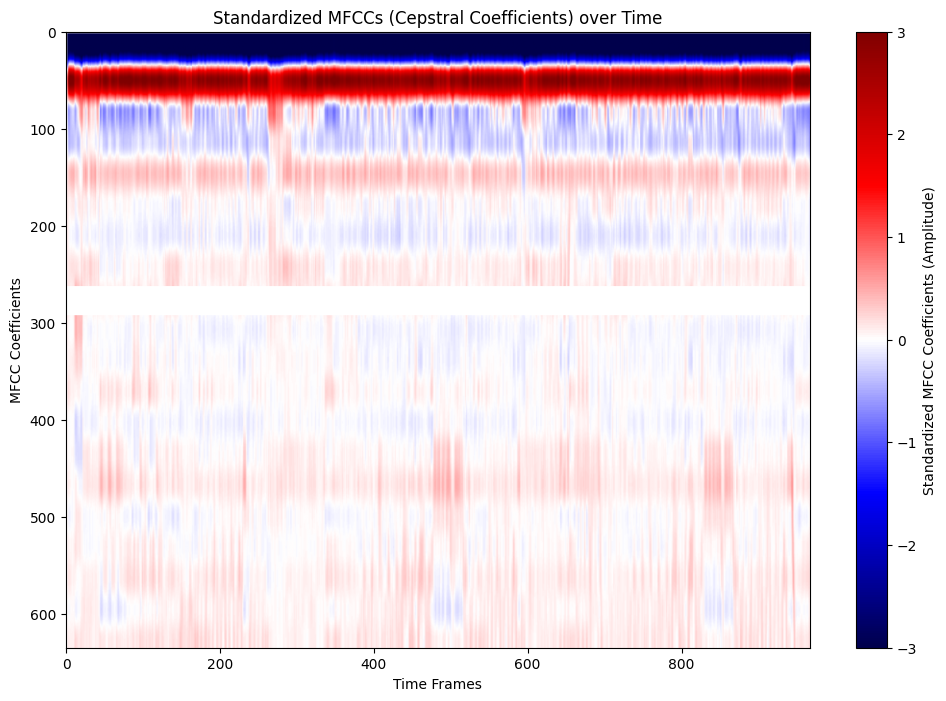

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


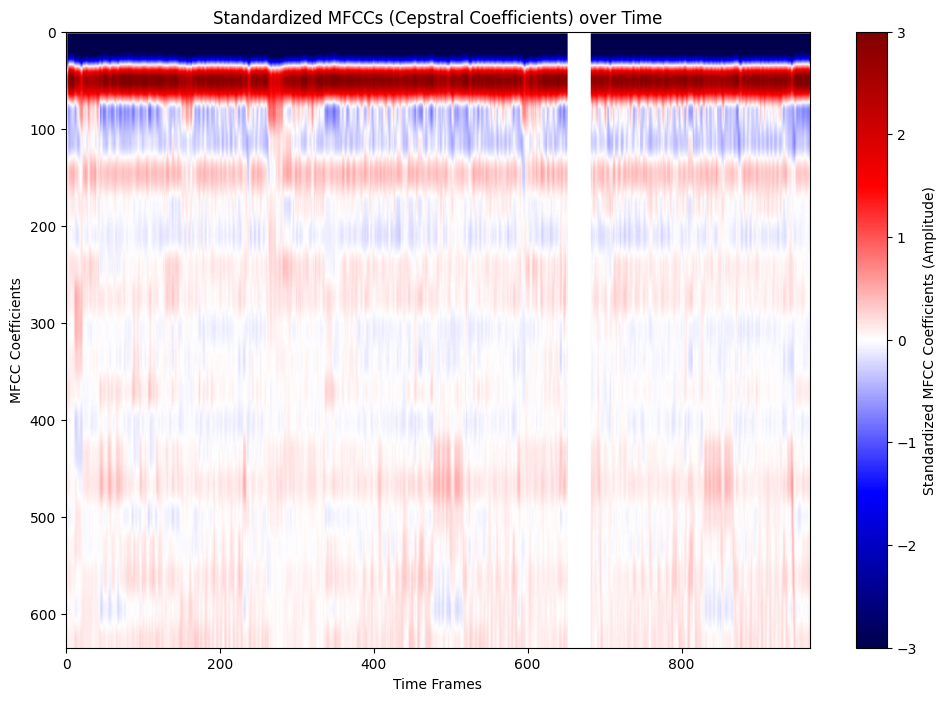

In [130]:
# Visualize
for image in augmented_spectrogram:
    plt.figure(figsize=(12, 8))
    plt.imshow(image, cmap='seismic', aspect='auto', vmin=-3, vmax=3)
    plt.colorbar(label='Standardized MFCC Coefficients (Amplitude)')
    plt.title("Standardized MFCCs (Cepstral Coefficients) over Time")
    plt.xlabel("Time Frames")
    plt.ylabel("MFCC Coefficients")
    plt.show()
